In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
def load_agent_data(file_path,maxiter,spacing):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(5):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i]
            elif data.find('success')!=-1:
                s_rate = np.load(file_path+'/' +data)[i]
            elif data.find('steps')!=-1 :
                steps = np.load(file_path+'/' +data)[i]
        train_epoch = np.arange(0,maxiter+1,spacing)
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':file_path})
        total_data.append(df)
    total_data = pd.concat(total_data,ignore_index=True,axis=0)
    return total_data

In [3]:
def load_base_data(file_path,maxiter,spacing):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(3):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i]
            elif data.find('steps')!=-1:
                steps = np.load(file_path+'/' +data)[i]
        train_epoch = np.arange(0,maxiter+1,spacing)
        s_rate = np.ones(train_epoch.shape[0])
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':file_path})
        total_data.append(df)
    total_data = pd.concat(total_data,ignore_index=True,axis=0)
    return total_data

In [4]:
ppodata2d = load_agent_data('PPO-2d',100,5)
basedata2d = load_base_data('Base-2d',100,5)

In [5]:
len(ppodata2d)

105

In [6]:
sns.set_style('darkgrid')

In [7]:
totaldata2d = pd.concat([ppodata2d,basedata2d],ignore_index=True,axis=0)

In [8]:
ppodata2d

,Rewards,Success rate,Steps,Train epoch,repeat,schema
0,-10.76025,0.07,86.47,0,0,PPO-2d
1,-4.80525,0.09,83.06,5,0,PPO-2d
2,-6.41825,0.15,74.78,10,0,PPO-2d
3,-3.58575,0.28,58.36,15,0,PPO-2d
4,-2.84025,0.31,54.22,20,0,PPO-2d
...,...,...,...,...,...,...
100,-0.00900,0.96,13.50,80,4,PPO-2d
101,0.51725,0.98,11.24,85,4,PPO-2d
102,0.24950,0.96,11.56,90,4,PPO-2d
103,0.55375,0.99,10.52,95,4,PPO-2d


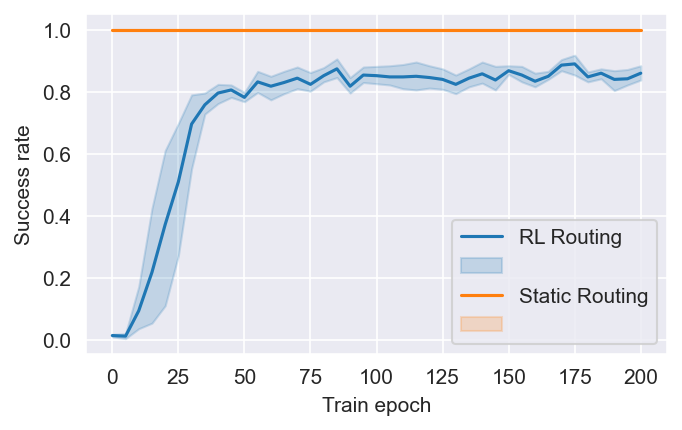

In [38]:
plt.figure(dpi=150,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=totaldata3d)
plt.legend(['RL Routing','','Static Routing',''])

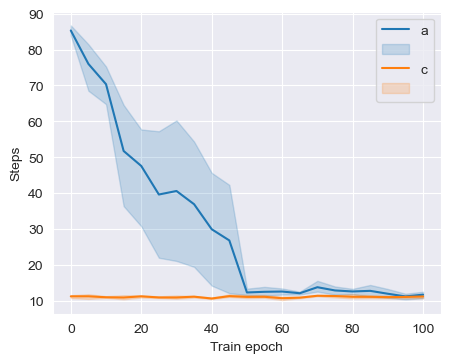

In [24]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',data=totaldata2d)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

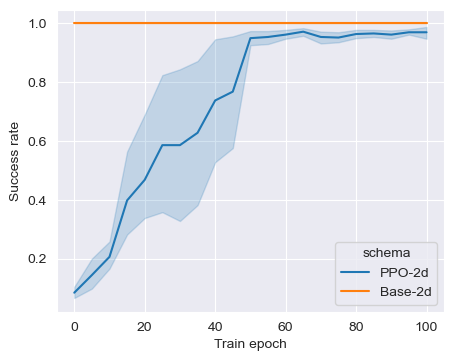

In [ ]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=totaldata2d)

In [31]:
ppodata3d = load_agent_data('PPO-3d',200,5)
basedata3d = load_base_data('Base-3d',200,5)

In [34]:
totaldata3d = pd.concat([ppodata3d,basedata3d],ignore_index=True,axis=0)

<AxesSubplot:xlabel='Train epoch', ylabel='Rewards'>

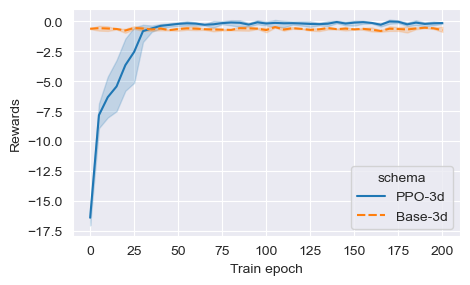

In [ ]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=totaldata3d)

<AxesSubplot:xlabel='Train epoch', ylabel='Steps'>

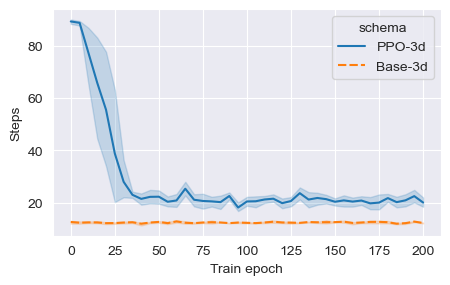

In [ ]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=totaldata3d)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

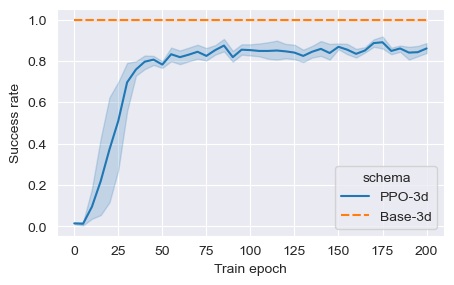

In [ ]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=totaldata3d)

In [ ]:
ppodata4d = load_agent_data('PPO-4d',150,2)
basedata4d = load_base_data('Base-4d',150,2)
totaldata4d = pd.concat([ppodata4d,basedata4d],axis=0)

<AxesSubplot:xlabel='Train epoch', ylabel='Rewards'>

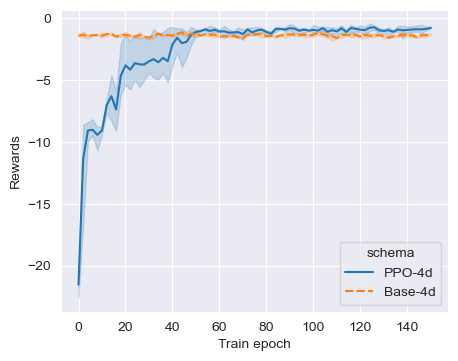

In [ ]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=totaldata4d)

<AxesSubplot:xlabel='Train epoch', ylabel='Steps'>

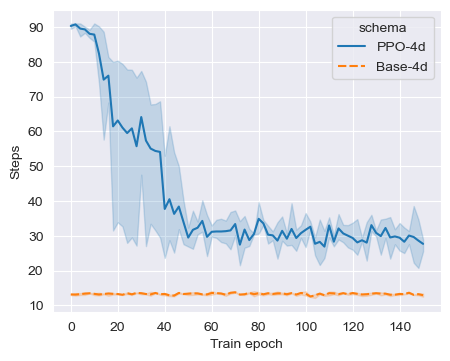

In [ ]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=totaldata4d)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

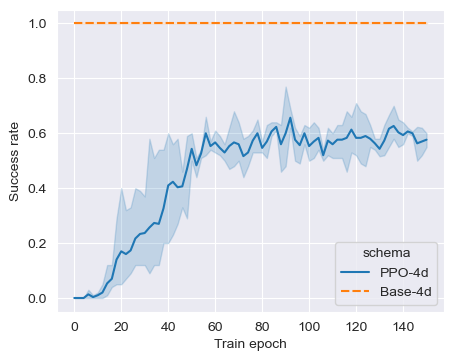

In [ ]:
plt.figure(dpi=100,figsize=(5,4))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=totaldata4d)